In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("mental_health_workplace_survey.csv")
print("Original Data:")
df

Original Data:


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,28,Female,Brazil,Marketing Manager,Sales,18,46,No,2.86,...,4,Yes,6.97,No,1,80K-100K,7.71,21,7.70,0
2996,3997,24,Male,Brazil,Customer Support,Marketing,14,31,No,2.43,...,1,Yes,5.58,Yes,0,60K-80K,3.76,2,2.59,0
2997,3998,22,Female,Canada,Marketing Manager,Marketing,0,38,No,6.87,...,25,No,3.81,No,0,40K-60K,3.03,2,6.95,0
2998,3999,57,Non-binary,Australia,Data Scientist,HR,2,41,No,3.62,...,24,No,9.72,No,3,100K+,6.02,37,9.06,0


In [11]:
df.shape

(3000, 25)

In [10]:
df.isnull().sum()     # Gives the sum of missing values in the dataframe

EmployeeID                0
Age                       0
Gender                    0
Country                   0
JobRole                   0
Department                0
YearsAtCompany            0
WorkHoursPerWeek          0
RemoteWork                0
BurnoutLevel              0
JobSatisfaction           0
StressLevel               0
ProductivityScore         0
SleepHours                0
PhysicalActivityHrs       0
CommuteTime               0
HasMentalHealthSupport    0
ManagerSupportScore       0
HasTherapyAccess          0
MentalHealthDaysOff       0
SalaryRange               0
WorkLifeBalanceScore      0
TeamSize                  0
CareerGrowthScore         0
BurnoutRisk               0
dtype: int64

In [12]:
num_cols = df.select_dtypes(include='number').columns   # Fill numeric columns with median
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    
cat_cols = df.select_dtypes(include='object').columns    # Fill categorical columns with mode
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

In [14]:
df.head()     # Gives only first 5 rowws from the dataframe

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [19]:
df['HoursPerDay'] = df['WorkHoursPerWeek'] / 7    # Creating a new column[HoursPerDay]
df['HoursPerDay']

0       6.714286
1       8.428571
2       8.428571
3       4.428571
4       4.857143
          ...   
2995    6.571429
2996    4.428571
2997    5.428571
2998    5.857143
2999    6.857143
Name: HoursPerDay, Length: 3000, dtype: float64

In [23]:
df['Worked'] = df['HoursPerDay'] > 18
df['Worked'].value_counts()

Worked
False    3000
Name: count, dtype: int64

In [5]:
print("Cleaned Data:")
df.head()

Cleaned Data:


,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [25]:
#Calculate median of 'HoursPerDay'
median_hours = df['HoursPerDay'].median()

#Replace values > 18 with the median
df['HoursPerDay'] = df['HoursPerDay'].apply(lambda x: median_hours if x > 18 else x)

In [26]:
(df['HoursPerDay'] > 18).sum()

np.int64(0)

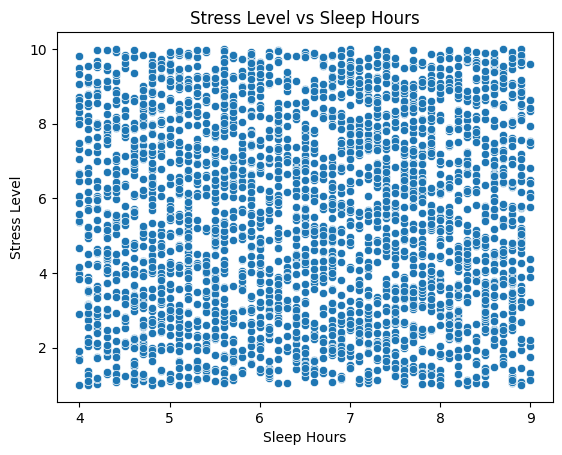

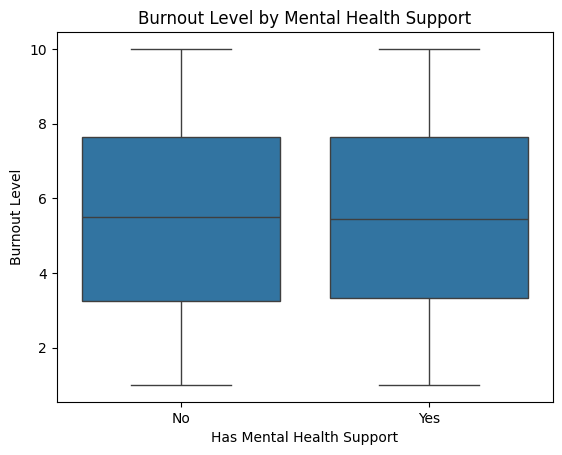

In [29]:
sns.scatterplot(x='SleepHours', y='StressLevel', data=df)
plt.title('Stress Level vs Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Stress Level')
plt.show()
sns.boxplot(x='HasMentalHealthSupport', y='BurnoutLevel', data=df)
plt.title('Burnout Level by Mental Health Support')
plt.xlabel('Has Mental Health Support')
plt.ylabel('Burnout Level')
plt.show()